1

In [ ]:
import numpy as np
np.diag(np.arange(1, 5), k = -1)

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 2, 0, 0, 0],
       [0, 0, 3, 0, 0],
       [0, 0, 0, 4, 0]])

2

In [ ]:
a = np.random.random((10, 3))
w = np.zeros(10)
for i in range(10):
  w[i] = np.min(np.fabs(a[i] - 0.5))
print(a, w) 

[[0.71793601 0.68009627 0.32165723]
 [0.17131011 0.0292934  0.25868487]
 [0.79926946 0.73592063 0.12550835]
 [0.11676921 0.68110938 0.1715552 ]
 [0.50080107 0.61789208 0.11910094]
 [0.45579077 0.0199831  0.76218246]
 [0.25284667 0.82390024 0.64361832]
 [0.33468229 0.14306078 0.3096137 ]
 [0.81686154 0.92200263 0.78336331]
 [0.969448   0.93521358 0.40511699]] [0.17834277 0.24131513 0.23592063 0.18110938 0.00080107 0.04420923
 0.14361832 0.16531771 0.28336331 0.09488301]


3

In [ ]:
arr = np.random.random((6, 6))
np.sum(arr, axis = 1)/np.max(arr, axis = 0)

array([2.5146088 , 2.65772529, 2.57073215, 5.15927773, 6.39121252,
       2.6848349 ])

4

In [ ]:
x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0])
k = 0
for i in range(8):
  if x[i] == 0:
    w[k] = x[i+1]
    k += 1
np.max(w)

20.0

5

In [ ]:
 x = np.ones(10)
 i = np.array([0, 1, 2, 3, 5, 5, 5, 8])
 z = np.zeros(10)
 for k in range(10):
   if np.argwhere(i == k).size != 0: 
     z[k] += np.argwhere(i == k).size
print(x + z)

[2. 2. 2. 2. 1. 4. 1. 1. 2. 1.]


kNN

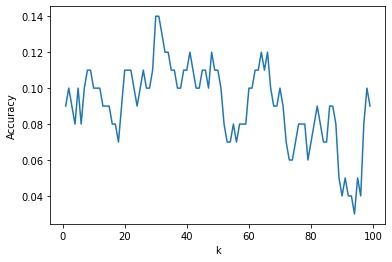

In [18]:
from sklearn.datasets import fetch_openml
from scipy.spatial.distance import cdist
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import numpy as np

images, labels = fetch_openml('mnist_784', return_X_y=True, as_frame=False)
train_size = 100
train_images = images[:train_size]
train_labels = labels[:train_size]
test_size = 100
test_images = images[-test_size:]
test_labels = labels[-test_size:]

def kNN(train_x, train_y, test, k) :
  dist = cdist(train_x, test)
  near = np.argsort(dist)[:,:k]
  nearl = train_y[near]
  all_classes = np.unique(train_y)
  result = np.concatenate([(nearl == i).sum(axis = 1, keepdims = True) for i in all_classes], axis = 1)
  result = result.argmax(axis = 1)
  return all_classes[result]

kNN(train_images, train_labels, test_images, 5)

accuracy = []
K = list(range(1,100))
for t in K:
 knn = kNN(train_images, train_labels, test_images, k = t)
 accuracy.append(accuracy_score(test_labels, knn))
plt.plot(K, accuracy)
plt.xlabel("k")
plt.ylabel("Accuracy")
plt.show()